In [2]:

import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


In [3]:
!unzip -u ../input/facial-keypoints-detection/test.zip
!unzip -u ../input/facial-keypoints-detection/training.zip

Archive:  ../input/facial-keypoints-detection/test.zip
  inflating: test.csv                
Archive:  ../input/facial-keypoints-detection/training.zip
  inflating: training.csv            


In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


In [5]:
df=pd.read_csv('training.csv')

In [6]:
df.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 31 columns]

In [7]:
df_test=pd.read_csv('test.csv')
df_test.head()

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...

In [8]:
len(df.iloc[0]['Image'])

33593

In [9]:
df.shape

(7049, 31)

In [10]:
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [11]:
# df.fillna(method = 'ffill',inplace = True)
df=df.dropna()

In [12]:
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [13]:
df.reset_index(inplace = True)
df.head()


index  left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0      0          66.033564          39.002274           30.227008   
1      1          64.332936          34.970077           29.949277   
2      2          65.057053          34.909642           30.903789   
3      3          65.225739          37.261774           32.023096   
4      4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   ...  nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
0  ...   57.066803            61.195308            79.970165   
1  ...   55.660936            56.421447            76.352000   
2  ...   53.538947            60.822947            73.014316   
3  ...   54.166539            65.598887            72.703722   
4  ...   64.889521            60.671411            77.523239   

   mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
0             28.614496             77.388992               43.312602   
1             35.122383             76.047660               46.684596   
2             33.726316             72.732000               47.274947   
3             37.245496             74.195478               50.303165   
4             31.191755             76.997301               44.962748   

   mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               72.935459                  43.130707   
1               70.266553                  45.467915   
2               70.191789                  47.274947   
3               70.091687                  51.561183   
4               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 32 columns]

In [14]:
df.drop(['index'],inplace=True,axis=1)
df.tail()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137            68.864397            77.495823             22.013981   
2138            73.730743            70.273886             38.777143   
2139            72.600433            71.862041             34.232759   

      mouth_right_corner_y  mouth_center_top_lip_x  mouth_center_top_lip_y  \
2135             74.014748               48.708626               76.760852   
2136             81.151722               48.771976               81.816774   
2137             77.368995               49.180628               79.043130   
2138             80.684286               58.042857               79.301429   
2139             77.339429               51.599453               75.963592   

      mouth_center_bottom_lip_x  mouth_center_bottom_lip_y  \
2135                  48.559612                  77.335618   
2136                  49.287271                  82.871156   
2137                  47.176739                  89.544522   
2138                  58.611086                  80.355543   
2139                  52.923371                  82.661062   

                                                  Image  
2135  191 191 191 190 189 185 184 120 54 34 19 24 31...  
2136  19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...  
2137  31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...  
2138  7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...  
2139  68 19 19 23 19 26 23 16 8 15 9 9 17 16 15 27 2...  

[5 rows x 31 columns]

In [15]:
df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))


In [16]:
df['Image']

0       [[238, 236, 237, 238, 240, 240, 239, 241, 241,...
1       [[219, 215, 204, 196, 204, 211, 212, 200, 180,...
2       [[144, 142, 159, 180, 188, 188, 184, 180, 167,...
3       [[193, 192, 193, 194, 194, 194, 193, 192, 168,...
4       [[147, 148, 160, 196, 215, 214, 216, 217, 219,...
                              ...                        
2135    [[191, 191, 191, 190, 189, 185, 184, 120, 54, ...
2136    [[19, 19, 19, 18, 13, 7, 3, 4, 3, 1, 3, 9, 11,...
2137    [[31, 40, 47, 31, 54, 58, 63, 100, 86, 80, 82,...
2138    [[7, 1, 5, 1, 3, 20, 12, 0, 5, 8, 6, 18, 13, 9...
2139    [[68, 19, 19, 23, 19, 26, 23, 16, 8, 15, 9, 9,...
Name: Image, Length: 2140, dtype: object

In [17]:
import matplotlib.pyplot as plt

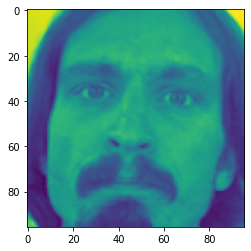

In [18]:
image=plt.imshow(df.loc[0]['Image'])

In [19]:
def plot_image(df, index):
    image = plt.imshow(df['Image'][index])
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(df.loc[index][i-1], df.loc[index][i], 'ro'))
        
    return image, l

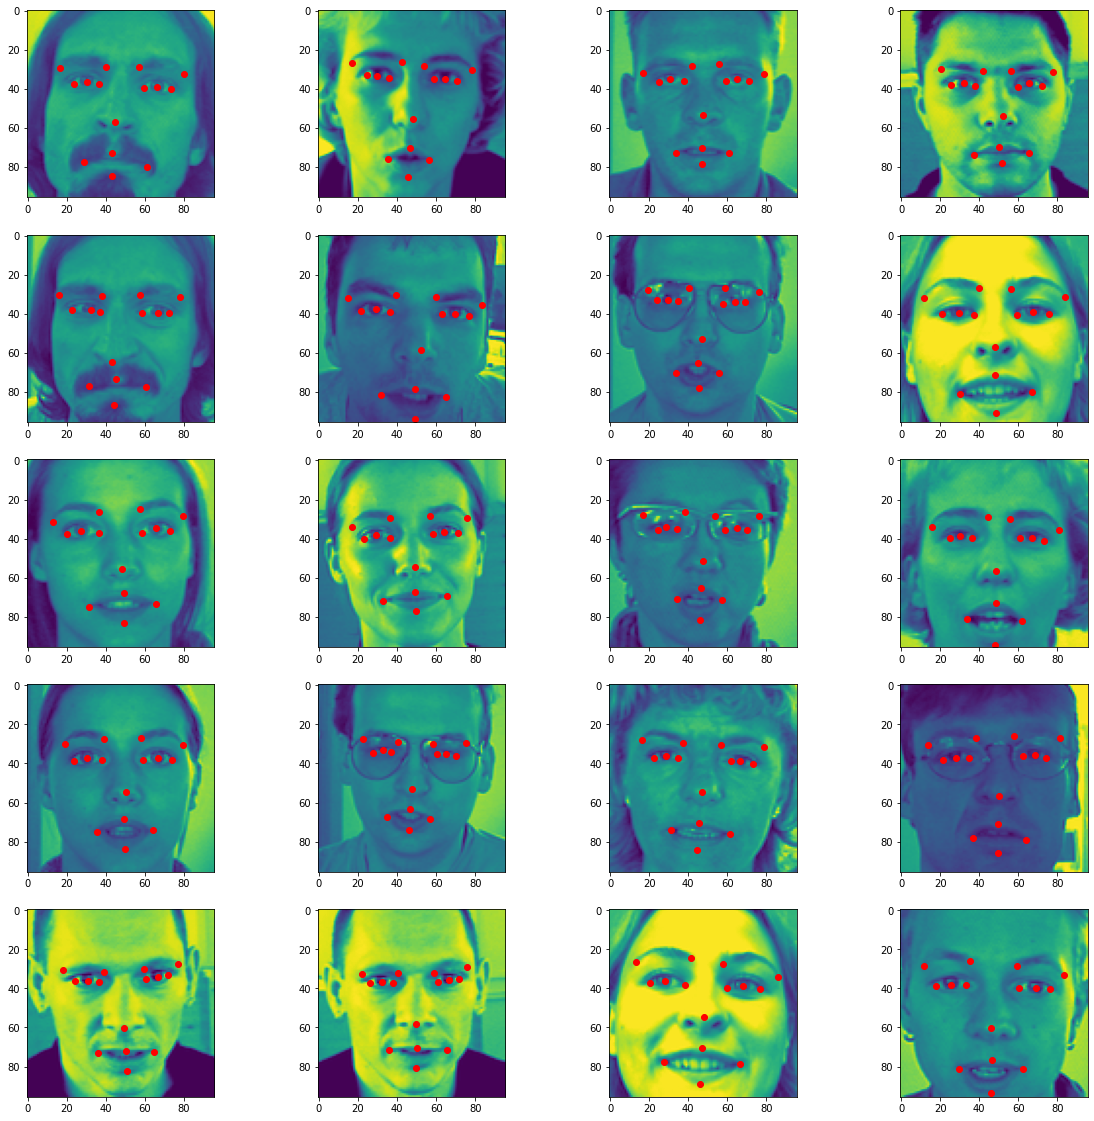

In [20]:
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(df, i)

plt.show()

In [21]:
df.shape

(2140, 31)

In [22]:
img = []
for i in range(0,df.shape[0]):
    im = df['Image'][i]
    img.append(im)

In [23]:
df.iloc[211]

left_eye_center_x                                                      64.6807
left_eye_center_y                                                      34.9859
right_eye_center_x                                                     29.5782
right_eye_center_y                                                     34.3359
left_eye_inner_corner_x                                                59.8051
left_eye_inner_corner_y                                                35.3109
left_eye_outer_corner_x                                                71.1811
left_eye_outer_corner_y                                                35.6359
right_eye_inner_corner_x                                               35.1033
right_eye_inner_corner_y                                               35.9609
right_eye_outer_corner_x                                               23.0778
right_eye_outer_corner_y                                               34.9859
left_eyebrow_inner_end_x                            

In [24]:
len(img),img[0].shape

(2140, (96, 96))

In [25]:
img = np.array(img,dtype = 'float')
img = np.asarray(img, dtype=np.uint8).reshape(img.shape[0],96,96,1)

In [26]:
img[0]

array([[[238],
        [236],
        [237],
        ...,
        [250],
        [250],
        [250]],

       [[235],
        [238],
        [236],
        ...,
        [249],
        [250],
        [251]],

       [[237],
        [236],
        [237],
        ...,
        [251],
        [251],
        [250]],

       ...,

       [[186],
        [183],
        [181],
        ...,
        [ 52],
        [ 57],
        [ 60]],

       [[189],
        [188],
        [207],
        ...,
        [ 61],
        [ 69],
        [ 78]],

       [[191],
        [184],
        [184],
        ...,
        [ 70],
        [ 75],
        [ 90]]], dtype=uint8)

In [27]:
img.shape

(2140, 96, 96, 1)

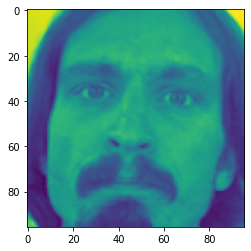

In [28]:
plt.imshow(img[0])

In [29]:
feature = df.drop('Image',axis = 1)
y = []
for i in range(0,df.shape[0]):
    points = feature.iloc[i,:]

    y.append(points)
y = np.array(y,dtype = 'float')

In [30]:
y.shape

(2140, 30)

In [31]:
y[0]

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_rest, y_train, y_rest = train_test_split(img, y, test_size=0.2, random_state=42)

In [33]:
x_test, x_val, y_test, y_val = train_test_split(x_rest, y_rest, test_size=0.5, random_state=42)

In [34]:
x_train.shape,x_test.shape,x_val.shape

((1712, 96, 96, 1), (214, 96, 96, 1), (214, 96, 96, 1))

In [35]:
y_train.shape,y_test.shape,y_val.shape

((1712, 30), (214, 30), (214, 30))

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [41]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)       

In [42]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])


In [43]:
history=model.fit(x_train,y_train,epochs = 500,batch_size = 64,validation_data=(x_val,y_val))

Epoch 1/500
27/27 [==============================] - 2s 49ms/step - loss: 787.6419 - mae: 20.1204 - val_loss: 405.3152 - val_mae: 18.6139
Epoch 2/500
27/27 [==============================] - 1s 38ms/step - loss: 33.6018 - mae: 4.5838 - val_loss: 173.6696 - val_mae: 12.0230
Epoch 3/500
27/27 [==============================] - 1s 38ms/step - loss: 25.6069 - mae: 3.9793 - val_loss: 103.9988 - val_mae: 9.2035
Epoch 4/500
27/27 [==============================] - 1s 40ms/step - loss: 23.7161 - mae: 3.8367 - val_loss: 63.8360 - val_mae: 7.1749
Epoch 5/500
27/27 [==============================] - 1s 38ms/step - loss: 21.5377 - mae: 3.6344 - val_loss: 49.8770 - val_mae: 6.1909
Epoch 6/500
27/27 [==============================] - 1s 38ms/step - loss: 18.0797 - mae: 3.3540 - val_loss: 38.0350 - val_mae: 5.4283
Epoch 7/500
27/27 [==============================] - 1s 38ms/step - loss: 17.0493 - mae: 3.2513 - val_loss: 29.4788 - val_mae: 4.6986
Epoch 8/500
27/27 [==============================] - 1s

In [44]:
model.save("facial2.h5")

In [45]:
evaluate = model.evaluate(x_test, y_test)
evaluate

7/7 [==============================] - 0s 7ms/step - loss: 1.5820 - mae: 0.8821


[1.581965684890747, 0.8820856213569641]

In [46]:
prediction=model.predict(x_test)

In [47]:
prediction[0]

array([65.060974, 36.836674, 30.832993, 37.904182, 58.54332 , 38.104347,
       71.68276 , 37.088665, 37.69172 , 38.33866 , 23.76803 , 39.125328,
       57.233643, 30.731756, 77.74782 , 29.213184, 40.474636, 31.022064,
       15.920894, 31.387129, 53.0142  , 55.1889  , 61.950916, 75.43882 ,
       37.425545, 76.676735, 50.922707, 72.402245, 51.448933, 79.84716 ],
      dtype=float32)

In [48]:
def plot_test_image(df,prediction, index):
    image = plt.imshow(df[index])
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(prediction[index][i-1], prediction[index][i], 'ro'))
        
    return image, l

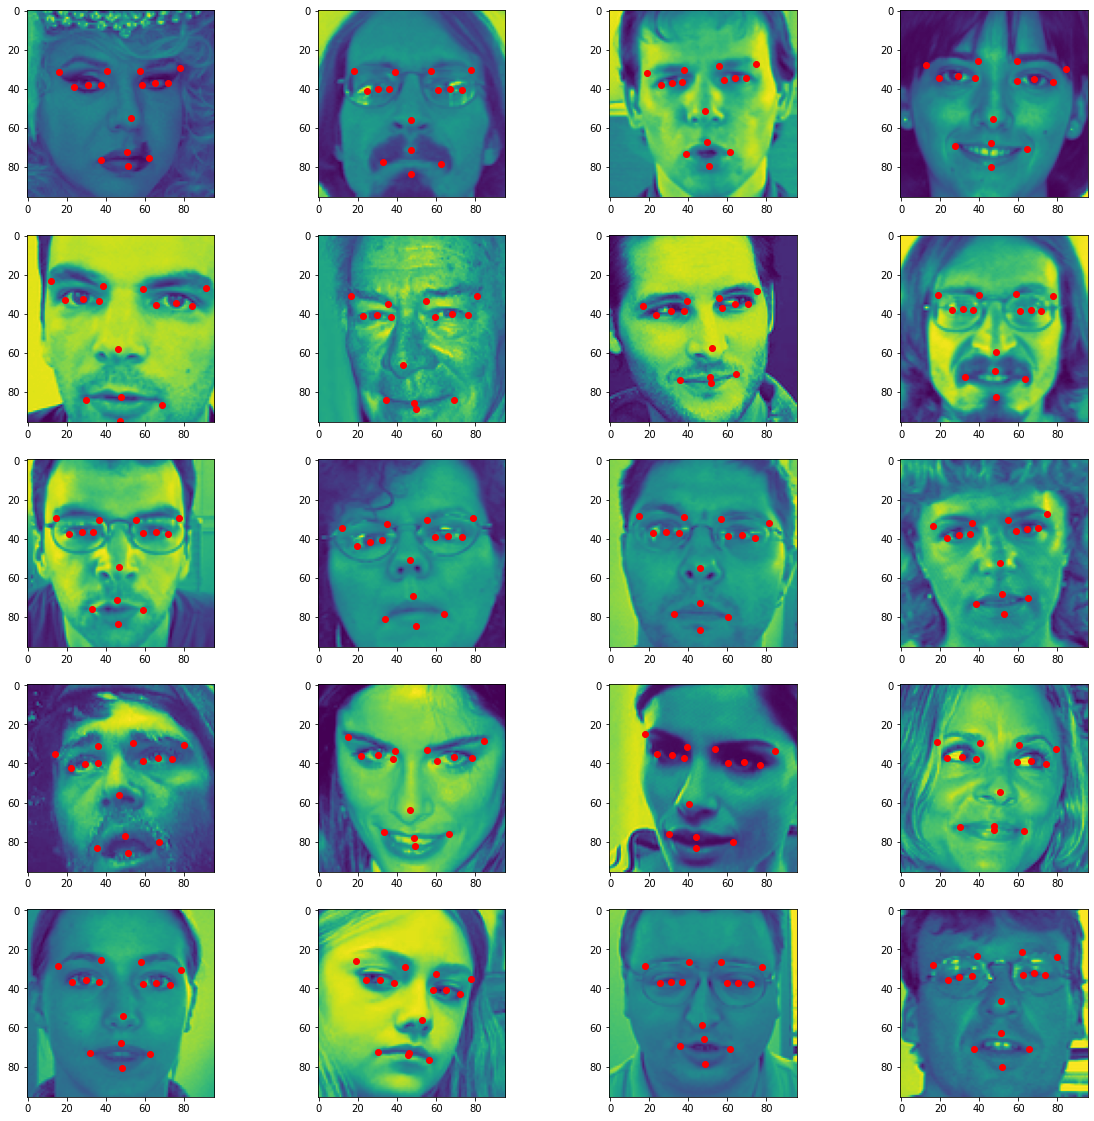

In [49]:
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_test_image(x_test,prediction, i)

plt.show()

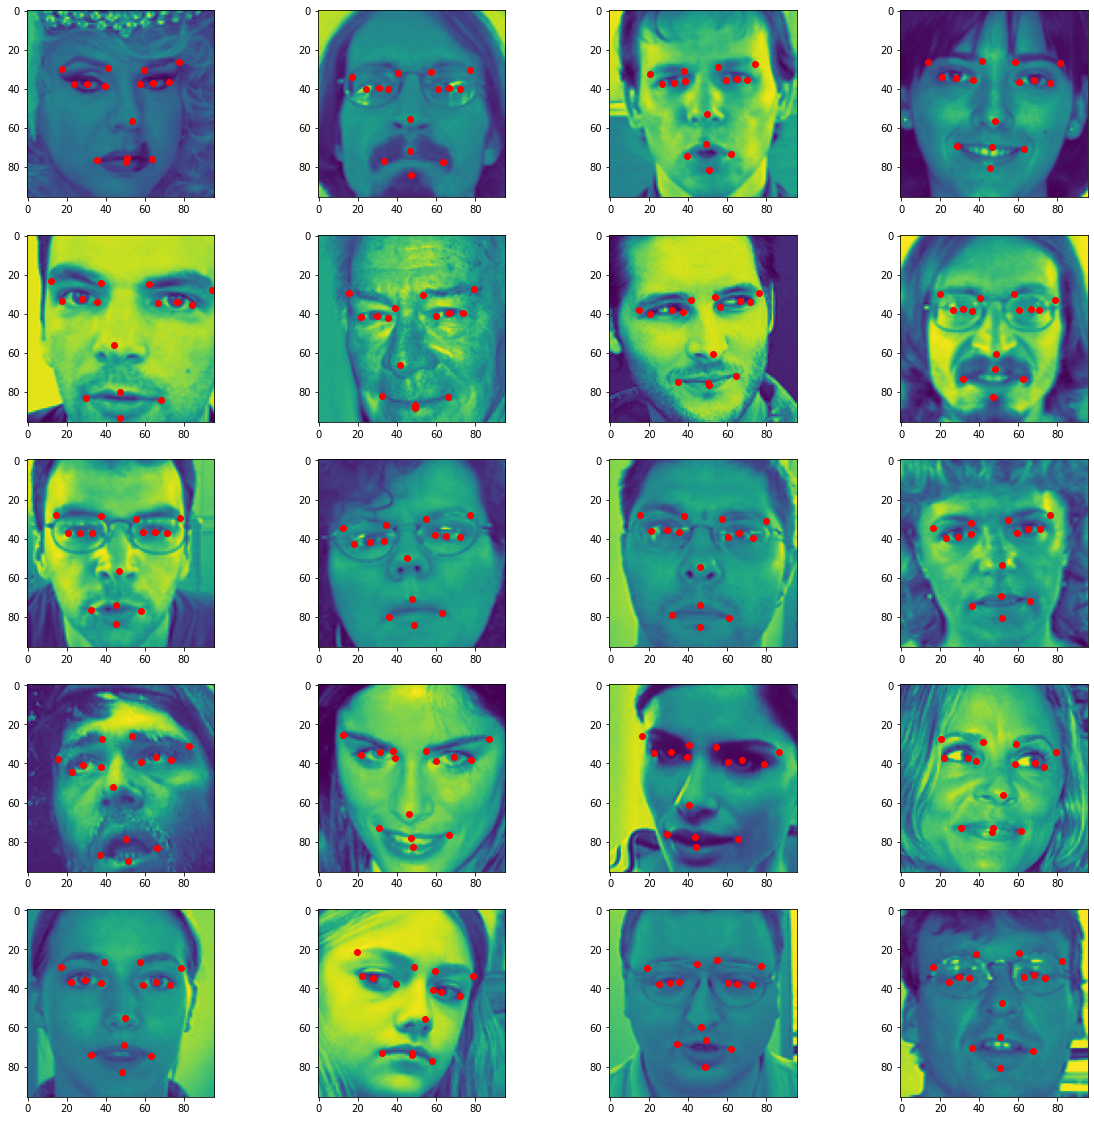

In [54]:
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_test_image(x_test,y_test, i)

plt.show()

In [56]:
df_test.head()

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...

In [57]:
df_test['Image'] = df_test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))


In [58]:
df_test.shape

(1783, 2)

In [59]:
df_test.head()

ImageId                                              Image
0        1  [[182, 183, 182, 182, 180, 180, 176, 169, 156,...
1        2  [[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, ...
2        3  [[177, 176, 174, 170, 169, 169, 168, 166, 166,...
3        4  [[176, 174, 174, 175, 174, 174, 176, 176, 175,...
4        5  [[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, ...

In [60]:
img_test = []
for i in range(0,1783):
    im = df_test['Image'][i]
    img_test.append(im)

In [61]:
img_test = np.array(img_test,dtype = 'float')
img_test = np.asarray(img_test, dtype=np.uint8).reshape(img_test.shape[0],96,96,1)

In [62]:
test_prediction=model.predict(img_test)

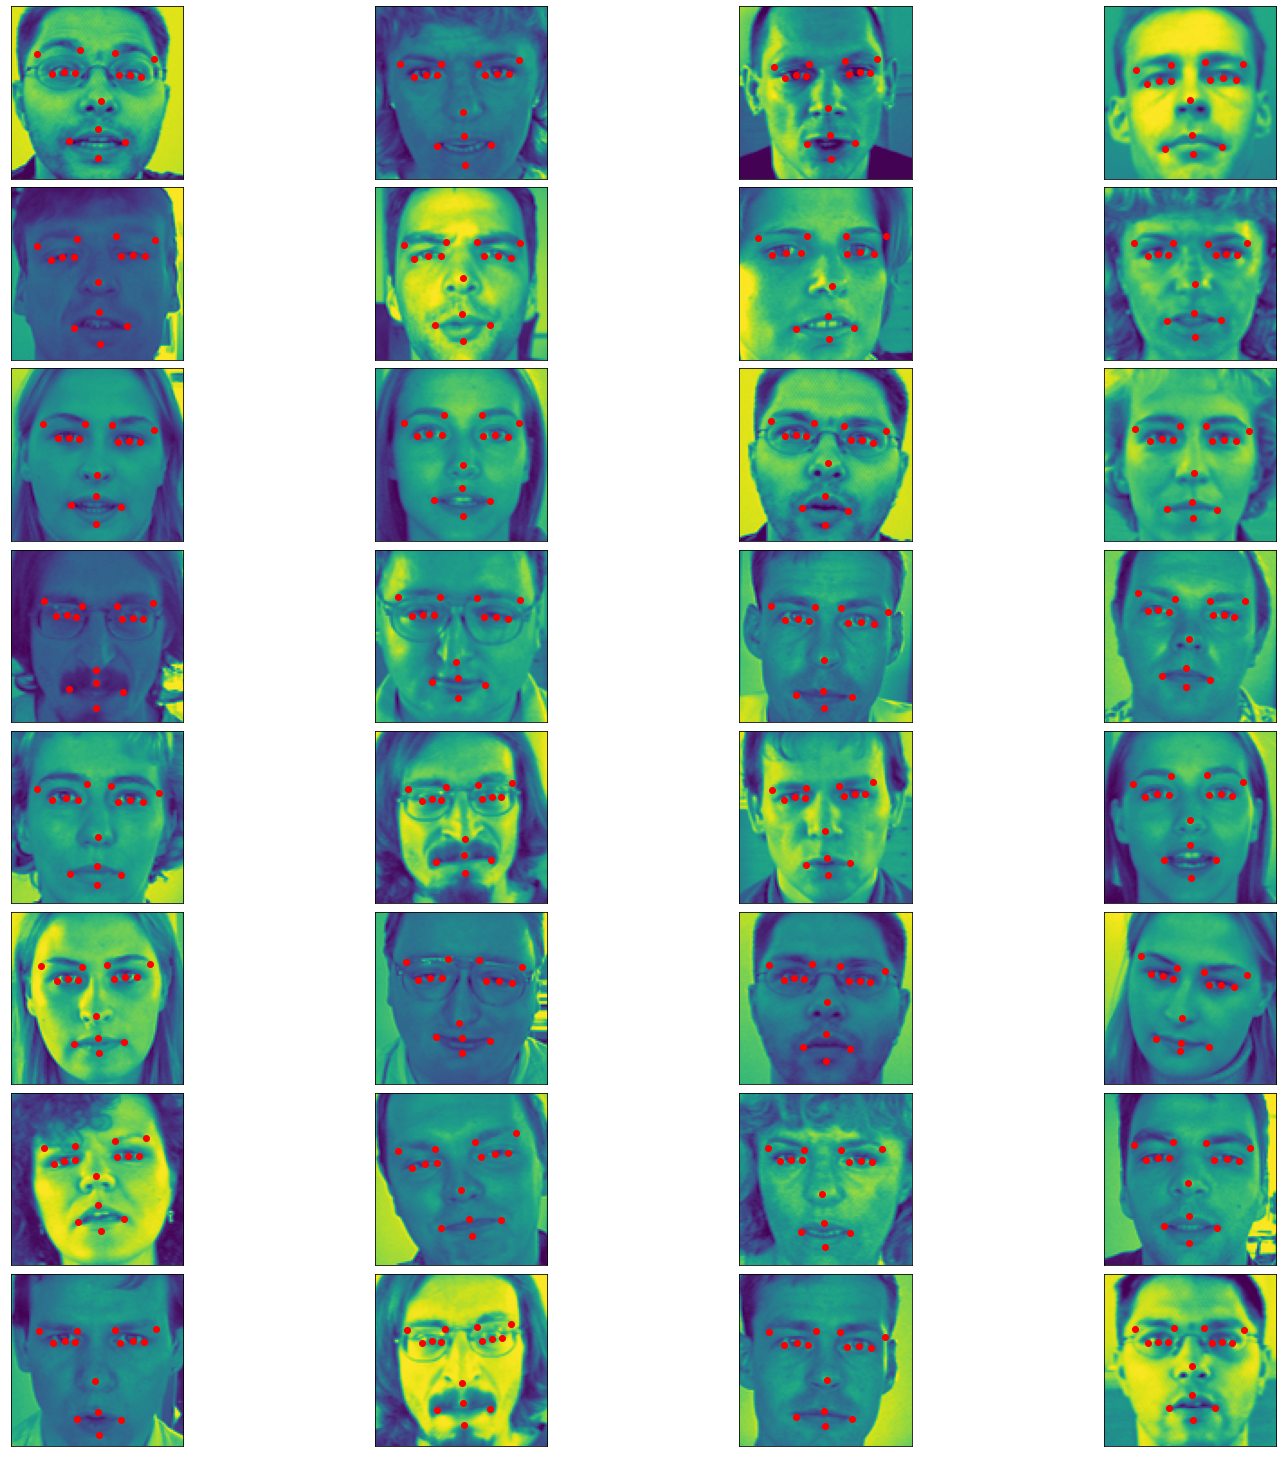

In [63]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(32):
    ax = fig.add_subplot(8, 4, i + 1,xticks=[],yticks=[])
    plot_test_image(img_test,test_prediction, i)

plt.show()

In [ ]:
col= list(df.columns)

In [ ]:
col.pop()

In [ ]:
col

In [ ]:
final = pd.DataFrame(test_prediction, columns = col)
final.head()

In [ ]:
lookup=pd.read_csv("../input/facial-keypoints-detection/IdLookupTable.csv")
lookup.head(10)

In [ ]:
lookup.shape

In [ ]:
for i in range(lookup.shape[0]):
    lookup.Location[i] = final.loc[lookup.ImageId[i]-1][lookup.FeatureName[i]]

In [ ]:
lookup.head()

In [ ]:
lookup.drop(['ImageId','FeatureName'],axis=1,inplace=True)

In [ ]:
lookup.head()

In [ ]:
lookup.to_csv("Jatin_goyal_submission.csv",index=False)